In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_path = r'C:\Users\admin\Downloads\SalesData\SalesData'

# merging 12 months of sales data in a single file

one_month = pd.read_csv(fr'{base_path}\Sales_April_2019.csv')
one_month.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [8]:
# list all files from the directory
files = os.listdir(base_path)
files

['Sales.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [9]:
# concatenate all files
all_month_data = pd.DataFrame()

for file in files:
    monthly_data = pd.read_csv(fr"{base_path}\{file}")
    all_month_data = pd.concat((all_month_data, monthly_data))
    
all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# convert to csv
all_month_data.to_csv(fr'{base_path}\{"Sales.csv"}', index = False)


In [10]:
all_data = pd.read_csv(fr'{base_path}\{"Sales.csv"}')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
# clean up the data
# Display all rows of NAN
all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
# convert order data in dateTime

all_data['Order Date'] = all_data['Order Date'].str.replace('/', '-')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

ParserError: Unknown string format: Order Date present at position 517

In [19]:
# let us see where this "Order Date" is by using conditional formatting.
temp = all_data.loc[all_data['Order Date'] == 'Order Date'] 
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV


In [20]:
# remove all 355 rows having "Order Date"
all_data = all_data.loc[all_data['Order Date']!='Order Date']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [17]:
# Again try to convert order date
all_data['Order Date'] = all_data['Order Date'].astype(str)
all_data['Order Date'] = all_data['Order Date'].str.replace('/', '-')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data


C:\Users\admin\AppData\Local\Temp\ipykernel_21304\2487133320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = all_data['Order Date'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_21304\2487133320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = all_data['Order Date'].str.replace('/', '-')
C:\Users\admin\AppData\Local\Temp\ipykernel_21304\2487133320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [21]:
# Add month column
all_data["Month"] = all_data['Order Date'].dt.month_name()
all_data["Month"]

0             April
2             April
3             April
4             April
5             April
            ...    
186845    September
186846    September
186847    September
186848    September
186849    September
Name: Month, Length: 185950, dtype: object

In [22]:
# What was the best month for sales? How much was earned that month?
# convert price each and quantity ordered in float and calcuate in tsv
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
all_data['Price Each'] = all_data['Price Each'].astype(float)

all_data['TSV'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April


In [25]:
# Find maximum TSV by groupby
results = all_data.groupby('Month')['TSV'].sum().sort_values(ascending=True)
results

Month
January      1822256.73
September    2097560.13
February     2202022.42
August       2244467.88
June         2577802.26
July         2647775.76
March        2807100.38
May          3152606.75
November     3199603.20
April        3390670.24
October      3736726.88
December     4613443.34
Name: TSV, dtype: float64

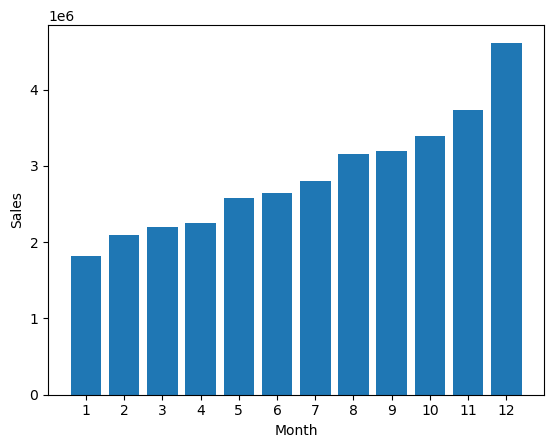

In [26]:
# Plot the data
month = range(1,13)
plt.bar(month,results)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [27]:
# What city sold the most product
all_data['City'] = all_data['Purchase Address'].str.split(',',expand=True)[1]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV,Month,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,September,Los Angeles
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,September,San Francisco
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,September,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,September,San Francisco


In [28]:
all_data.groupby('City')['Quantity Ordered'].sum().sort_values()

City
 Austin           11153.0
 Portland         14053.0
 Seattle          16553.0
 Atlanta          16602.0
 Dallas           16730.0
 Boston           22528.0
 New York City    27932.0
 Los Angeles      33289.0
 San Francisco    50239.0
Name: Quantity Ordered, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_21304\809813614.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city , df in all_data.groupby(['City'])]
C:\Users\admin\AppData\Local\Temp\ipykernel_21304\809813614.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys, all_data.groupby(['City']).sum()['TSV'])


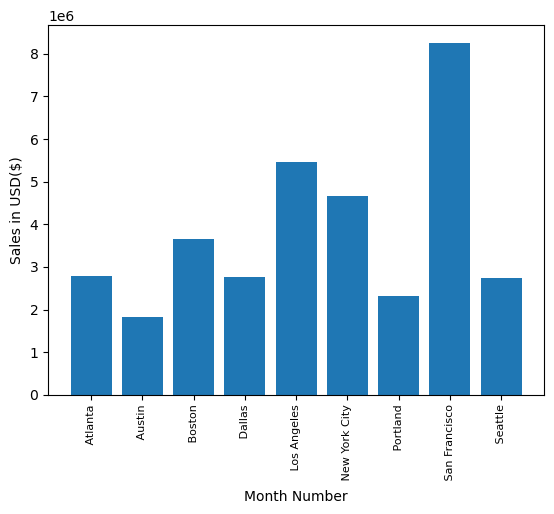

In [30]:
# Plot the data
keys = [city for city , df in all_data.groupby(['City'])]
plt.bar(keys, all_data.groupby(['City']).sum()['TSV'])
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.xticks(keys, rotation = 'vertical', size =8)
plt.show()


In [31]:
# What time should we display advertisements to maximize the likelihood of customer's buying product?
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Los Angeles,9,27


In [32]:
all_data.groupby('Hour')['TSV'].sum().sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: TSV, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_21304\3403175195.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


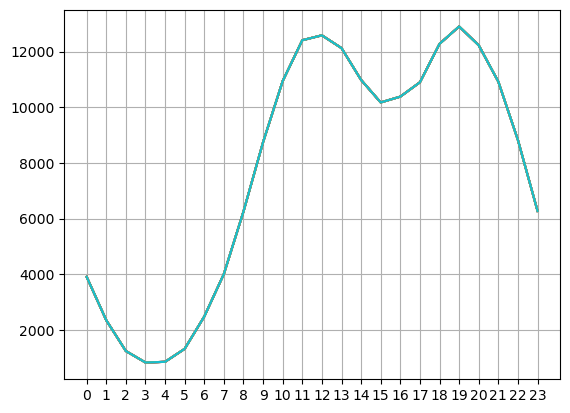

In [34]:
# plot the data
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(keys, all_data.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

In [36]:
# What products are most often sold together?
# All duplicate order ID
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV,Month,City,Hour,Minute
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles,14,38
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles,19,42
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles,19,42
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston,11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,September,Atlanta,20,18
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,September,Atlanta,0,25
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,September,Atlanta,0,25
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,September,San Francisco,13,49


In [38]:
# Group different products with same order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_21304\74209052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,TSV,Month,City,Hour,Minute,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,April,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,April,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,April,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,April,San Francisco,17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,April,San Francisco,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,April,New York City,11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,April,New York City,11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

count = Counter()
row_list = []
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 271),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  50),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  20),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  17)]

<Axes: xlabel='Product'>

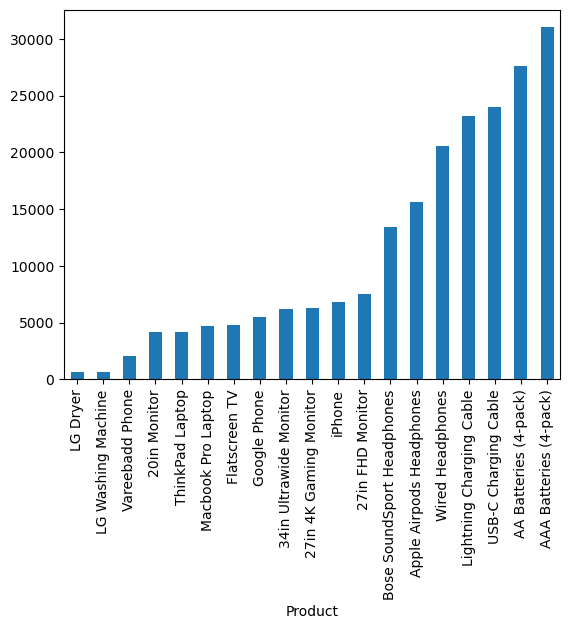

In [40]:
# What product sold the most? Why do you think it sold the most?
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind = 'bar')